# IMPORTING ALL THE REQUIRED LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error,mean_absolute_error
import seaborn as sns
from sklearn.model_selection import train_test_split as tt
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from scipy.stats import skew
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor ,GradientBoostingRegressor

ModuleNotFoundError: No module named 'pandas'

# IMPORTING THE DATA AND DATA INFORMATION

In [2]:
df=pd.read_csv("INvideos.csv")
nf=df.shape[0]
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,views
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,1096327
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",590101
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,473988
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,1242680
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,464015


In [3]:
print("DATA INFORMATION : \n")
print(df.info())
print("CHECKING DATA FOR NULL VALUES: \n")
print(df.isna().sum())

DATA INFORMATION : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   likes                   37352 non-null  int64 
 8   dislikes                37352 non-null  int64 
 9   comment_count           37352 non-null  int64 
 10  thumbnail_link          37352 non-null  object
 11  comments_disabled       37352 non-null  bool  
 12  ratings_disabled        37352 non-null  bool  
 13  video_error_or_removed  37352 non-null  bool  
 14  description             36791 non

## we have NaN values in -> description - column. 

# Cleaning the Data & Featuring Engingeering 

In [4]:
df1 = df.copy()
df1 = df1.drop(["video_id","description","title","channel_title","thumbnail_link"],axis=1,)
df1.isna().sum()

trending_date             0
category_id               0
publish_time              0
tags                      0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
views                     0
dtype: int64

In [5]:
df1.head()

,trending_date,category_id,publish_time,tags,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,views
0,17.14.11,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",33966,798,882,False,False,False,1096327
1,17.14.11,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",735,904,0,True,False,False,590101
2,17.14.11,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,2011,243,149,False,False,False,473988
3,17.14.11,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",70353,1624,2684,False,False,False,1242680
4,17.14.11,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",492,293,66,False,False,False,464015


# EDA

In [6]:
unique_views = df1["views"].unique()
len_unique_views= len(unique_views)
print("Unique_views: \n",unique_views)
print("Count of Unique_view: ", len_unique_views)

Unique_views: 
 [1096327  590101  473988 ... 2675706  770873 1214423]
Count of Unique_view:  32136


Pearson Model


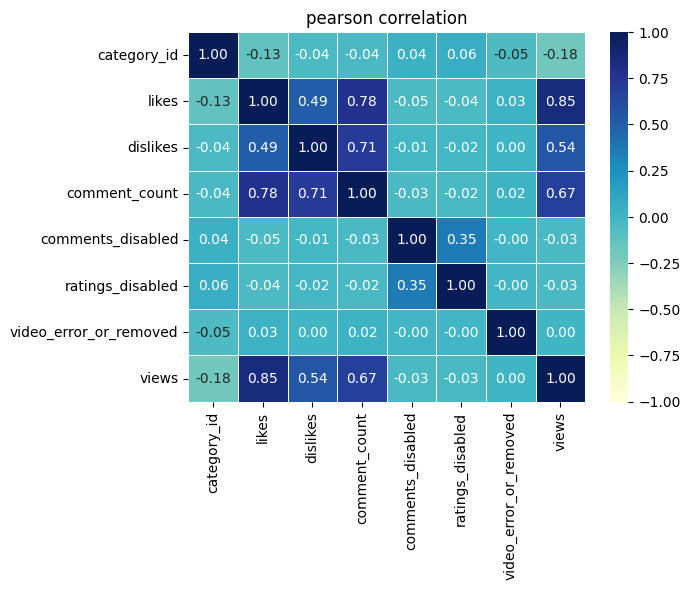

In [7]:
print("Pearson Model")
corr_matrix=df.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")
plt.show()

In [8]:
X=df1.iloc[:, : -1]
Y=df1["views"]
X=X.select_dtypes(include= ['int'])
X["category_id"]=df["category_id"]
print(X)
print(Y)

       category_id  likes  dislikes  comment_count
0                1  33966       798            882
1               25    735       904              0
2               24   2011       243            149
3               23  70353      1624           2684
4               24    492       293             66
...            ...    ...       ...            ...
37347           23   3291       404            196
37348           24   1726       478           1428
37349           24   1216       453            697
37350           24    698       115             65
37351           24  22466      1609           1205

[37352 rows x 4 columns]
0        1096327
1         590101
2         473988
3        1242680
4         464015
          ...   
37347     214378
37348     406828
37349     386319
37350     130263
37351    1278249
Name: views, Length: 37352, dtype: int64


# TARGET IS VIEWS. PREDICITING VIEWS NOW.. 


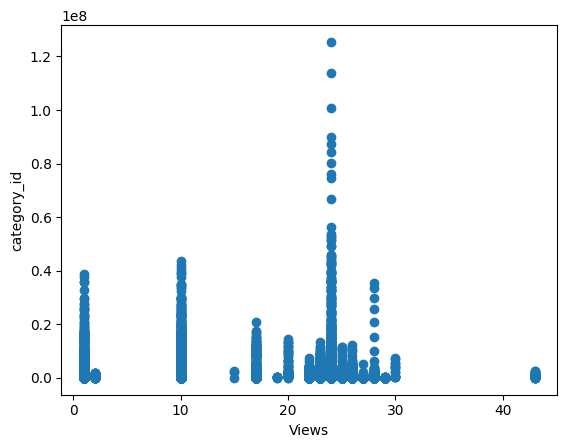

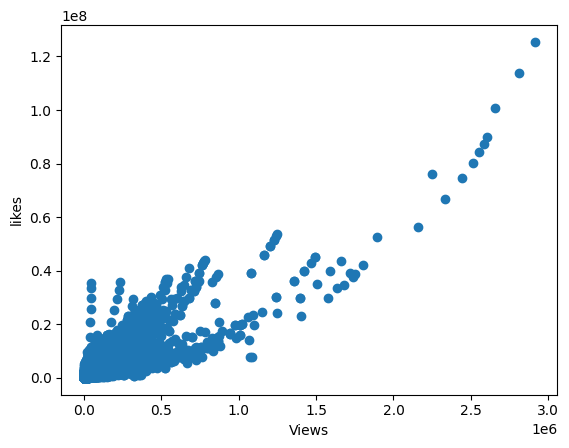

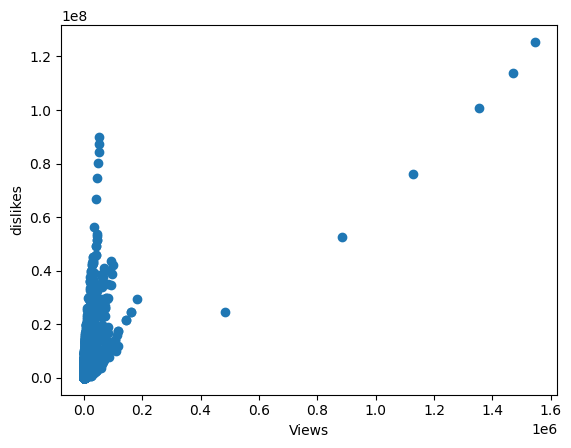

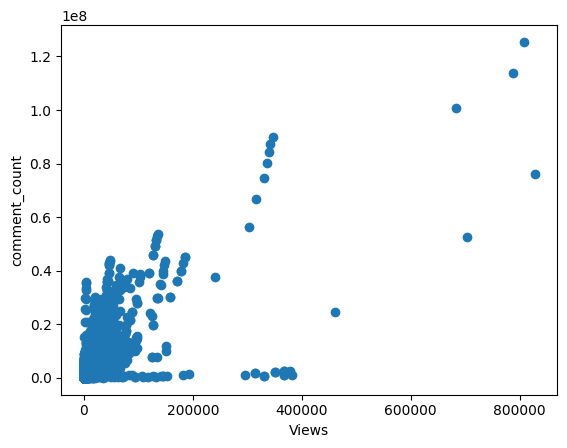

In [9]:
for i in X.columns:
    plt.scatter(X[f'{i}'],Y)
    plt.ylabel(f'{i}')
    plt.xlabel("Views")
    plt.show()

# Self made Linear Regression 

In [10]:
def normalise(x):
    u=x.mean(axis=0)
    std=x.std(axis=0)
    return (x-u)/std
X=normalise(X)

In [11]:
def preprocess(x):
    if x.shape[0]==nf:
        ones=np.ones((x.shape[0],1))
        x=np.hstack((ones,x))
    return x
X=preprocess(X)
X=pd.DataFrame(X)


In [12]:
XT,Xt,yT,yt=tt(X,Y,test_size=0.3)
yt=yt.squeeze()
yT=yT.squeeze()
y = np.ma.ravel(XT)


In [13]:
def hypothesis(x,theta):
    return np.dot(x,theta)

def loss(x,y,theta):
    yp=hypothesis(x,theta)
    err=np.mean((y-yp)**2)
    return err

def gradient(x,y,theta):
    yp=hypothesis(x,theta)
    grad=np.dot(x.T,(yp-y))
    m=x.shape[0]
    return grad/m

def train(x,y,learning_Rate=0.1,max_iters=100):
    n=x.shape[1]
    theta=np.random.randn(n)
    error=[]
    for i in range(max_iters):
        e=loss(x,y,theta)
        error.append(e)
        grad=gradient(x,y,theta)
        theta=theta-learning_Rate*grad
        
    plt.plot(error)
    return theta

[1055693.45137436 -260968.9205967  2431798.29084781  616404.09439023
 -170787.61190641]


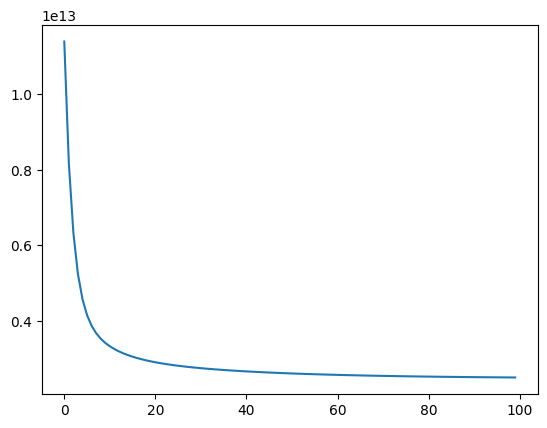

In [14]:
theta=train(XT,yT)
print(theta)

# SCORE 

In [15]:
def r2score1(y,y2):
    ymean=y.mean()
    num=np.sum((y-yp)**2)
    dem=np.sum((y-ymean)**2)
    return (1-num/dem)*100
yp=hypothesis(Xt,theta)

predictions=[]
predictions.append(yp)
self_made_linear_score=r2score1(yt,yp)
R2_score = round(r2_score(yt, yp), 2)
Mean_Absolute_Error = (mean_absolute_error(yt, yp))
Root_Mean_Squared_Error= (np.sqrt(mean_squared_error(yt, yp)))
listoferror=[]
listoferror.append(R2_score)
listoferror.append(Mean_Absolute_Error)
listoferror.append(Root_Mean_Squared_Error)


In [16]:
models = {
    'linear_model' : LinearRegression(),
    'tree_model' : DecisionTreeRegressor(),
    'forest_model' : RandomForestRegressor(),
    'adaboost_model' : AdaBoostRegressor(),
    'gradientboost_model' : GradientBoostingRegressor()
}
model_keys=[]
for i in models.keys():
    model_keys.append(i)

In [17]:
for name, model in models.items():
    model.fit(XT, yT)
    print(f'{name} trained')
print("Training Done!")

linear_model trained
tree_model trained
forest_model trained
adaboost_model trained
gradientboost_model trained
Training Done!


# EVALUATION 


In [21]:
results = {}
list_of_errors=[]
for name, model in models.items():
    yp=model.predict(Xt)
    predictions.append(yp)
    print(f'\n{name} tested')
    result = r2(yp,yt)
    results[name] = result*100
    R2_score = round(r2_score(yt, yp), 2)
    Mean_Absolute_Error = (mean_absolute_error(yt, yp))
    Root_Mean_Squared_Error= (np.sqrt(mean_squared_error(yt, yp)))
    list_of_errors.append([R2_score,Mean_Absolute_Error,Root_Mean_Squared_Error])
print("\nTesting Done!\n")
results["self_made_linear"]=self_made_linear_score
print("Error: ")
for key in results:
    print(key, " = ", results[key])



linear_model tested

tree_model tested

forest_model tested

adaboost_model tested

gradientboost_model tested

Testing Done!

Error: 
linear_model  =  61.76207136927214
tree_model  =  88.07411293917076
forest_model  =  93.03391086132507
adaboost_model  =  74.17118693751925
gradientboost_model  =  84.76436430625267
self_made_linear  =  73.69454590342643


In [22]:
list_of_errors.append(listoferror)
list_of_errors

[[0.74, 627340.1747225305, 1600254.1170201167],
 [0.87, 319593.9408354902, 1115887.2462750566],
 [0.94, 287761.76470408496, 798764.6592409153],
 [0.78, 653848.2178082509, 1471027.6211853868],
 [0.87, 435506.01488765434, 1118992.3673574026],
 [0.74, 632997.8137690423, 1609316.6624482633]]

In [23]:
model_keys.append("Self_Made_Model")
col=["R2_score","Mean_Absolute_Error","Root_Mean_Squared_Error"]
error_Dataframe= pd.DataFrame(list_of_errors,columns=col,index=model_keys)
error_Dataframe

,R2_score,Mean_Absolute_Error,Root_Mean_Squared_Error
linear_model,0.74,627340.174723,1.600254e+06
tree_model,0.87,319593.940835,1.115887e+06
forest_model,0.94,287761.764704,7.987647e+05
adaboost_model,0.78,653848.217808,1.471028e+06
gradientboost_model,0.87,435506.014888,1.118992e+06
Self_Made_Model,0.74,632997.813769,1.609317e+06


## CHOSING BEST 3 SCORES AND COMBINING

In [24]:
results
pred1=results["forest_model"]*0.34
pred2=results["gradientboost_model"]*0.33
pred3=results["tree_model"]*0.33
pred=pred1+pred2+pred3
print("Combined score: ",pred)

Combined score:  88.66822718384026


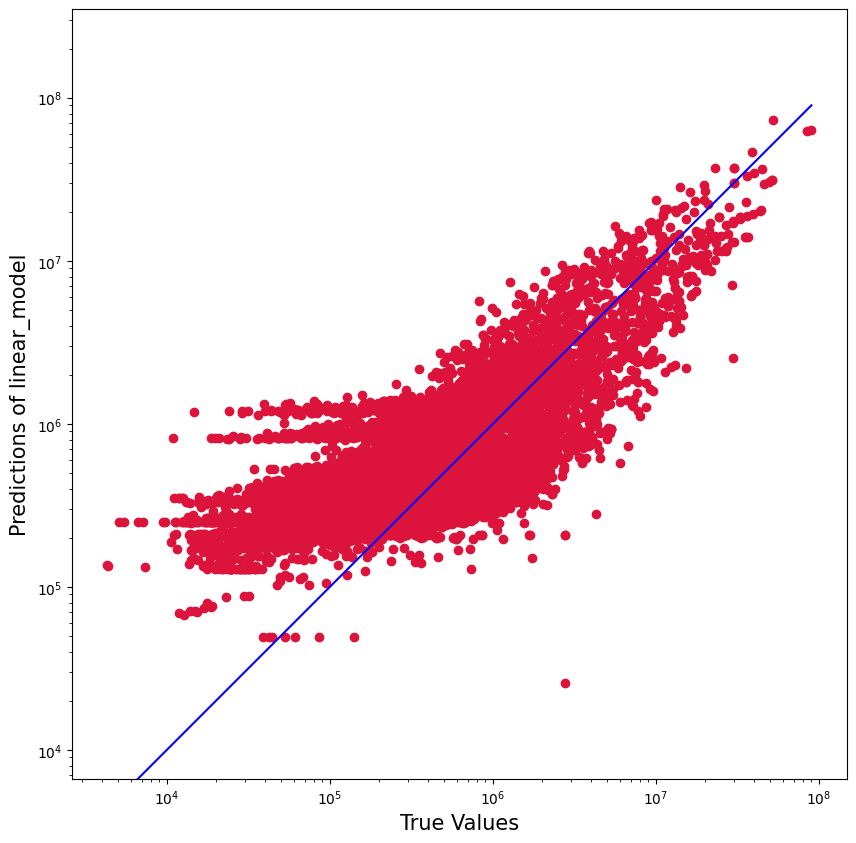

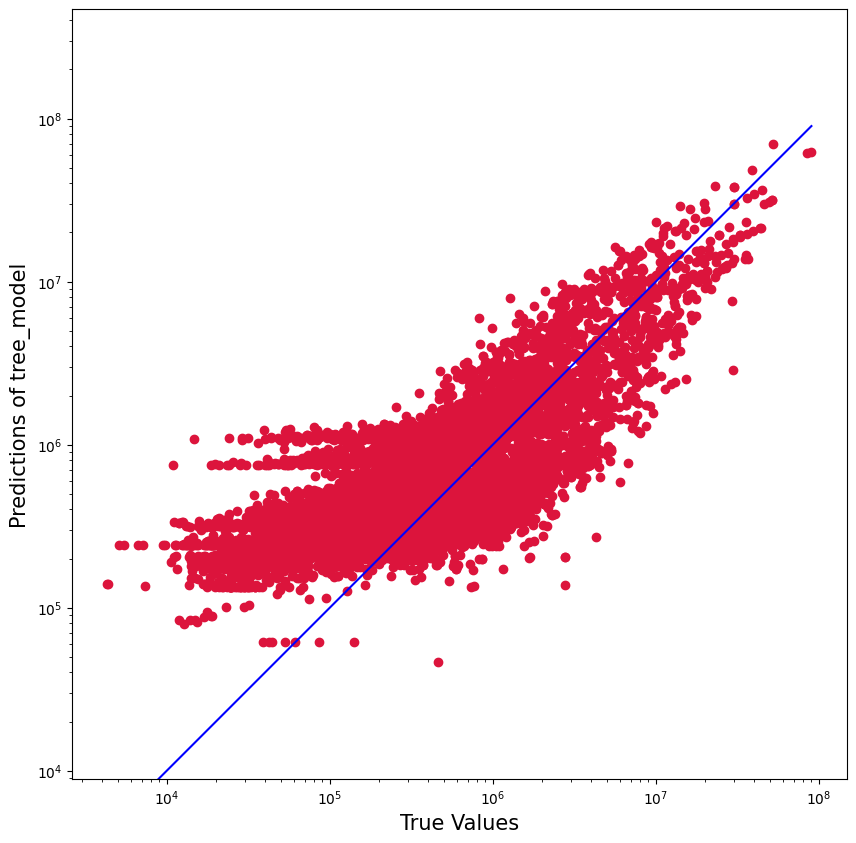

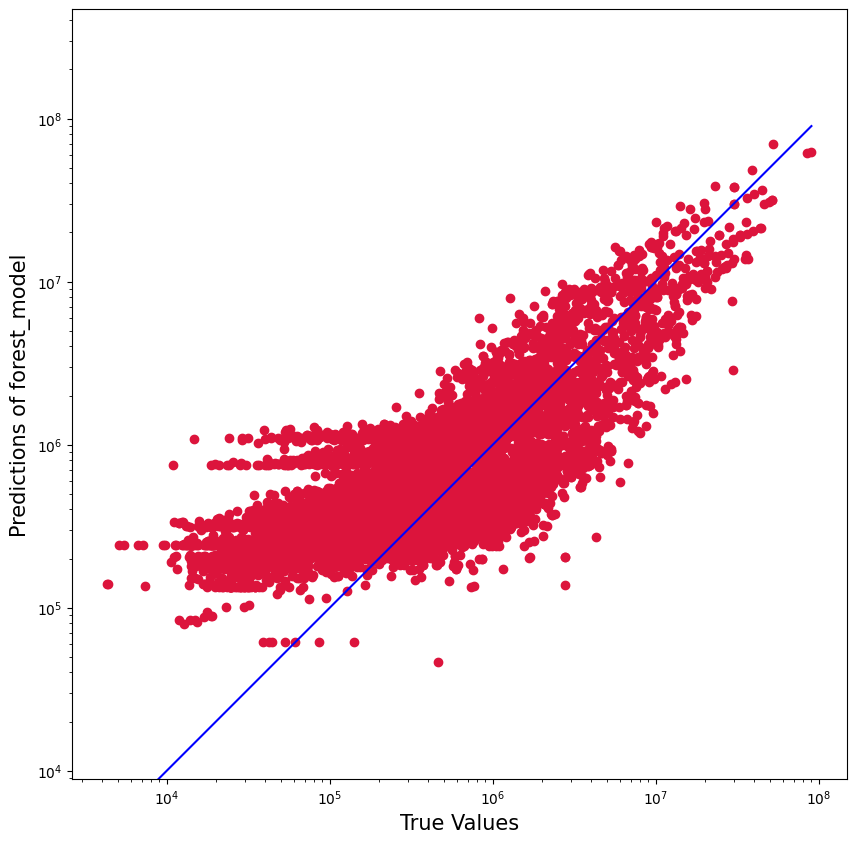

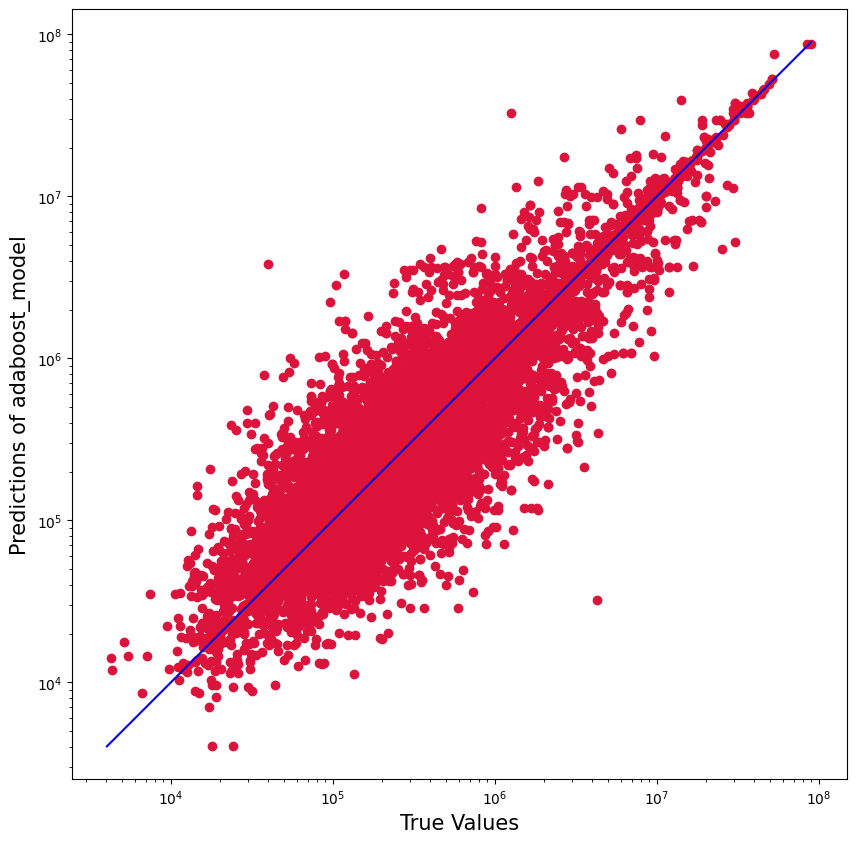

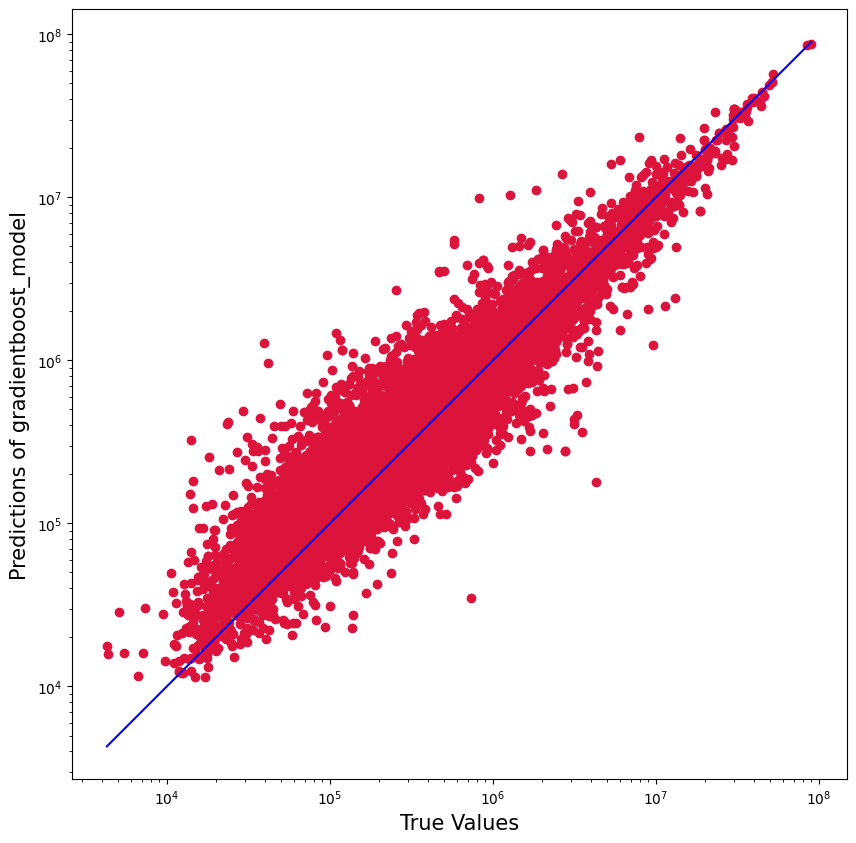

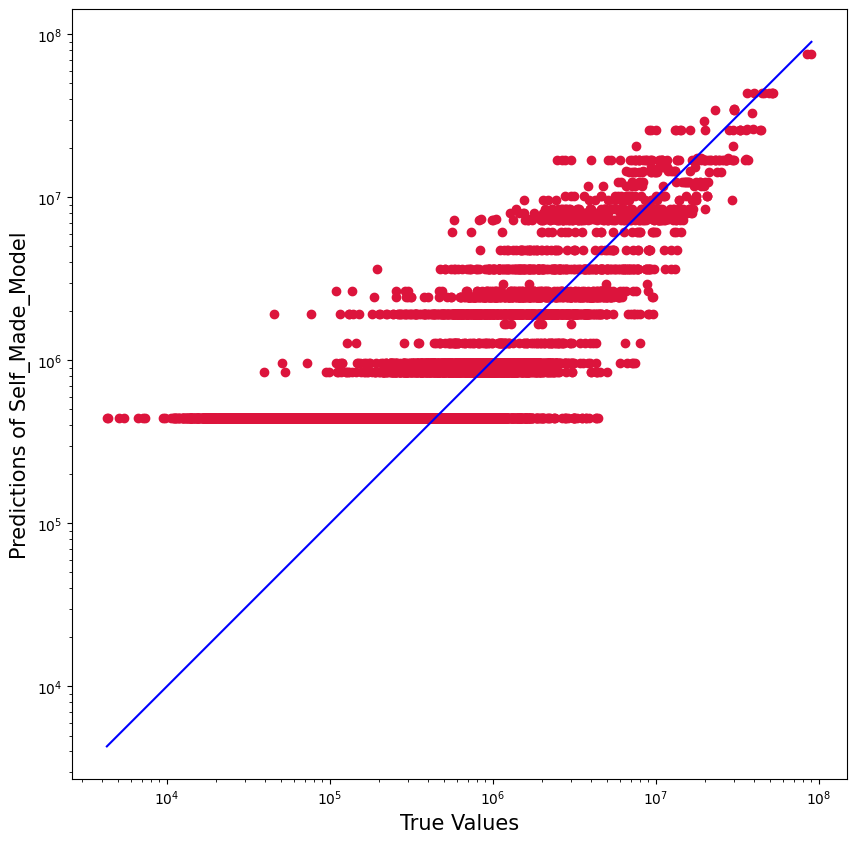

IndexError: list index out of range

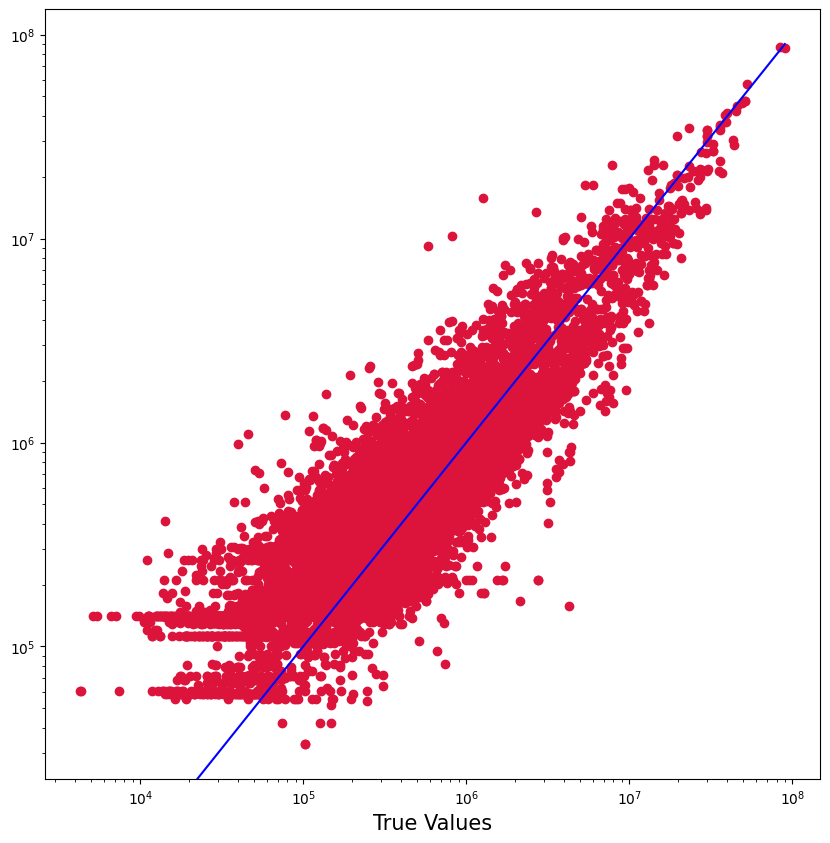

In [25]:
for i in range(len(predictions)):
    yp=predictions[i]
    plt.figure(figsize=(10,10))
    plt.scatter(yt, yp, c='crimson')
    plt.yscale('log')
    plt.xscale('log')
    p1 = max(max(yp), max(yt))
    p2 = min(min(yp), min(yt))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel(f'Predictions of {model_keys[i]}', fontsize=15)
    plt.axis('equal')
    plt.show()

# Hence the best algorithm -> Random Forest Regressor

In [26]:
print(f"Score of Random_Forest_Regressor : {results['forest_model']}\n")

Score of Random_Forest_Regressor : 93.03391086132507



# Now running the same algorithm for the data of countries :-  USA , Canda

## FOR USA

In [27]:
df_usa=pd.read_csv("USvideos.csv")
df_usa.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,Unnamed: 7,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,views
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,NaN,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,748374
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",NaN,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2418783
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",NaN,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,3191434
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",NaN,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,343168
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",NaN,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2095731


### AFTER RUNNING THE ALGORITHMS

In [28]:
error_Dataframe

,R2_score,Mean_Absolute_Error,Root_Mean_Squared_Error
linear_model,0.74,627340.174723,1.600254e+06
tree_model,0.87,319593.940835,1.115887e+06
forest_model,0.94,287761.764704,7.987647e+05
adaboost_model,0.78,653848.217808,1.471028e+06
gradientboost_model,0.87,435506.014888,1.118992e+06
Self_Made_Model,0.74,632997.813769,1.609317e+06


## FOR CANADA

In [29]:
df_canada=pd.read_csv("CAvideos.csv")
df_canada.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,Unnamed: 7,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Unnamed: 16,views
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",NaN,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,NaN,17158579
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",NaN,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,NaN,1014651
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",NaN,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,NaN,3191434
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",NaN,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,NaN,2095828
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",NaN,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,NaN,33523622


### AFTER RUNNING THE ALGORITHMS

In [30]:
error_Dataframe

,R2_score,Mean_Absolute_Error,Root_Mean_Squared_Error
linear_model,0.74,627340.174723,1.600254e+06
tree_model,0.87,319593.940835,1.115887e+06
forest_model,0.94,287761.764704,7.987647e+05
adaboost_model,0.78,653848.217808,1.471028e+06
gradientboost_model,0.87,435506.014888,1.118992e+06
Self_Made_Model,0.74,632997.813769,1.609317e+06
